<a href="https://colab.research.google.com/github/HamidMandi/MNE/blob/main/MNE_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
! git clone "https://github.com/mne-tools/mne-workshops.git"

Cloning into 'mne-workshops'...
remote: Enumerating objects: 170, done.
remote: Total 170 (delta 0), reused 0 (delta 0), pack-reused 170
Receiving objects: 100% (170/170), 115.03 MiB | 6.86 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [3]:
!pip install mne

     |████████████████████████████████| 6.9 MB 8.5 MB/s 


In [4]:
import mne
import numpy as np
import matplotlib.pyplot as plt


In [7]:
fname_raw = "/content/gdrive/MyDrive/Colab Notebooks/MNE/oddball2-epo.fif"
epochs = mne.read_epochs(fname_raw)

Reading /content/gdrive/MyDrive/Colab Notebooks/MNE/oddball2-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


In [9]:
epochs

Number of events,212
Events,standard/STIM: 106target/STIM: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [12]:
epochs.get_data().shape

(212, 64, 71)

#Evocked

The next step is visualization the signal spike as we are working on evocked potential. For that we first perform averaging to norm target ERPs.

In [13]:
target = epochs["target"].average()
target

<Evoked | 'target/STIM' (average, N=106), -0.2 – 0.5 sec, baseline -0.2 – 0 sec, 63 ch, ~103 kB>

In [15]:
standard = epochs["standard"].average()

In [22]:
epochs.get_data().shape

(212, 64, 71)

In [23]:
epochs["target"].get_data().shape     #(numer of trials, numer of channels, time point)

(106, 64, 71)

In [24]:
target.data.shape

(63, 71)

In [28]:
print(target.info)

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 63
 projs: []
 sfreq: 100.0 Hz
>


In [30]:
target.info["ch_names"]

['FP1',
 'FP2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'SO1',
 'FT7',
 'FC3',
 'FC4',
 'FT8',
 'SO2',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'FCz']

We explore how many Plot function we can use to visualize our data

In [31]:
dir(target)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aspect_kind',
 '_data',
 '_get_channel_positions',
 '_pick_drop_channels',
 '_pick_projs',
 '_projector',
 '_reconstruct_proj',
 '_set_channel_positions',
 '_size',
 '_update_first_last',
 'add_channels',
 'add_proj',
 'add_reference_channels',
 'animate_topomap',
 'anonymize',
 'apply_baseline',
 'apply_function',
 'apply_hilbert',
 'apply_proj',
 'as_type',
 'baseline',
 'ch_names',
 'comment',
 'compensation_grade',
 'copy',
 'crop',
 'data',
 'decimate',
 'del_proj',
 'detrend',
 'drop_channels',
 'filter',
 'first',
 'get_channel_types',
 'get_montage',
 'get_peak',
 'info',
 'interpola

* 'plot',
*  'plot_field',
* 'plot_image',
*  'plot_joint',
*  'plot_projs_topomap',
*  'plot_sensors',
*  'plot_topo',
* 'plot_topomap',
*  'plot_white',

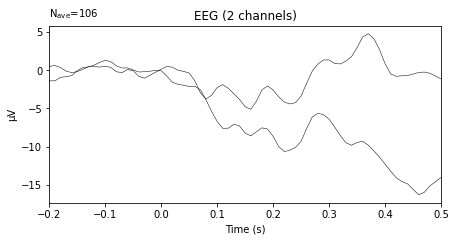

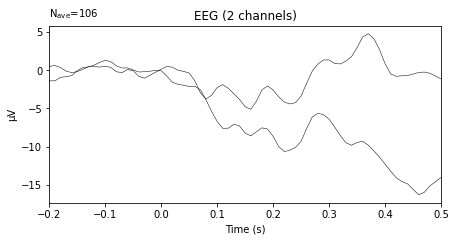

In [75]:
target.plot(picks=[16, 5])

In [77]:
target.plot_field?

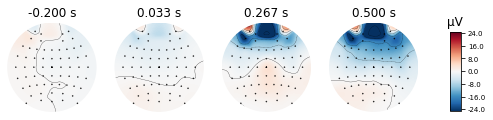

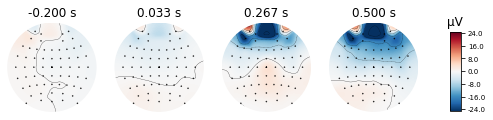

In [79]:
target.plot_topomap()

In [34]:
target.plot_topomap?

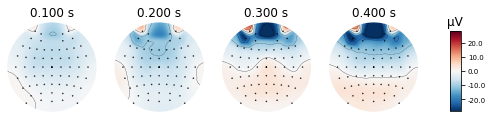

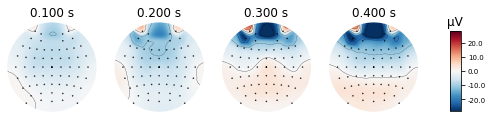

In [36]:
target.plot_topomap(times = [0.1, 0.2, 0.3, 0.4])

No projector specified for this dataset. Please consider the method self.add_proj.


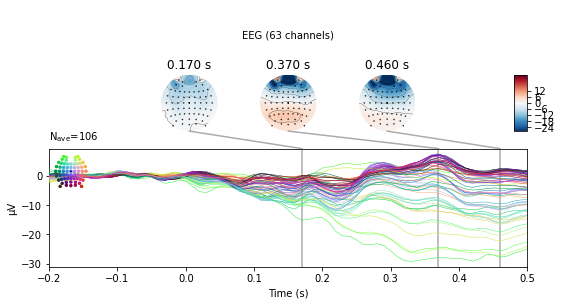

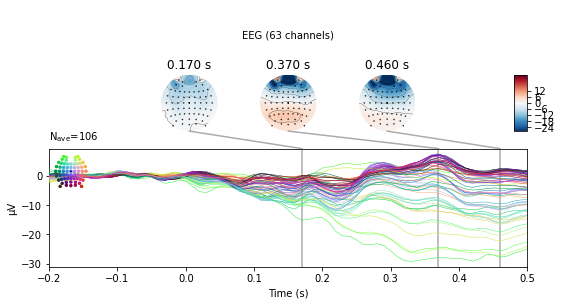

In [73]:
target.plot_joint()                         # A joint of time and topomap plot 

No projector specified for this dataset. Please consider the method self.add_proj.


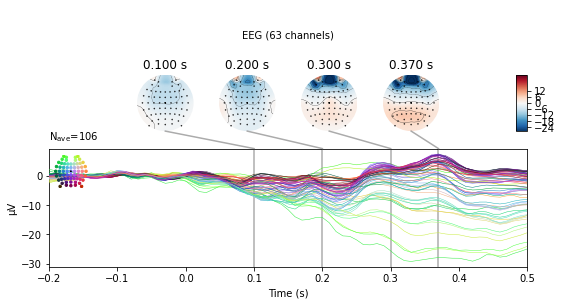

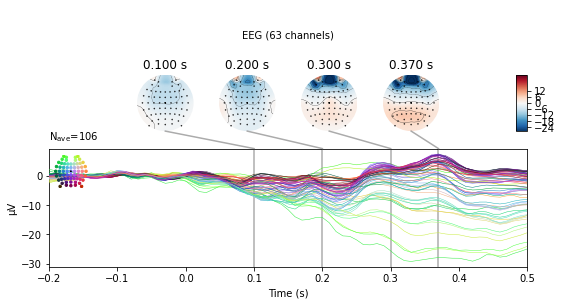

In [42]:
target.plot_joint(times= [0.1, 0.2, 0.3, 0.37])

For condition contrasts, you can use `mne.combine.evoked`

No projector specified for this dataset. Please consider the method self.add_proj.


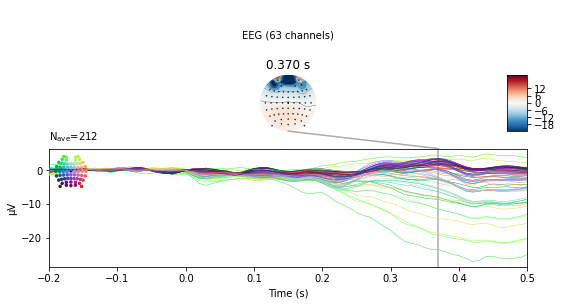

In [52]:
diff = mne.combine_evoked((target, -standard), weights="equal")
_ = diff.plot_joint(times=0.37)

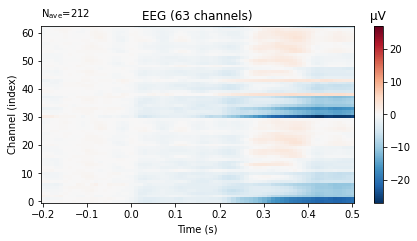

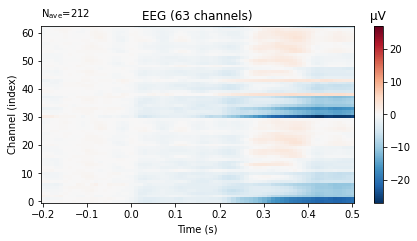

In [53]:
diff.plot_image()     #HeatMap

We can plot the region of interst (RoIs) because we have a 10/20 electrode layout

In [56]:
rois = mne.channels.make_1020_channel_selections(diff.info, midline="z12")

In [57]:
rois

{'Left': array([25, 57, 58, 20, 53, 21, 48, 16, 49, 12, 44, 11, 40,  7, 39,  3, 34,
         2, 31, 30]),
 'Midline': array([27, 28, 26, 59, 54, 55, 22, 17, 18, 50, 46, 13, 45, 62,  9,  8,  4,
        36, 35,  1,  0, 38, 43]),
 'Right': array([29, 61, 60, 24, 56, 23, 52, 19, 51, 14, 15, 47, 41, 10, 42,  5, 37,
         6, 32, 33])}

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

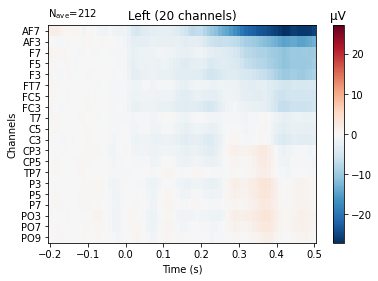

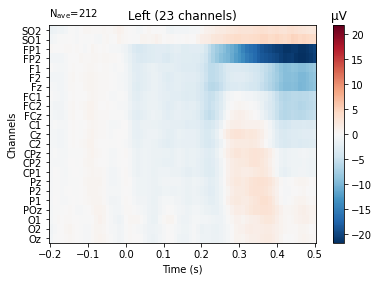

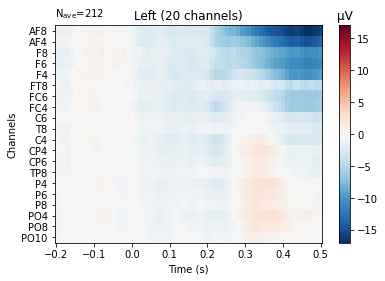

In [60]:
diff.plot_image(group_by=rois, show=False, show_names="all")

To contrast multiple conditions `mne.viz.plot_compare_evokeds` is available

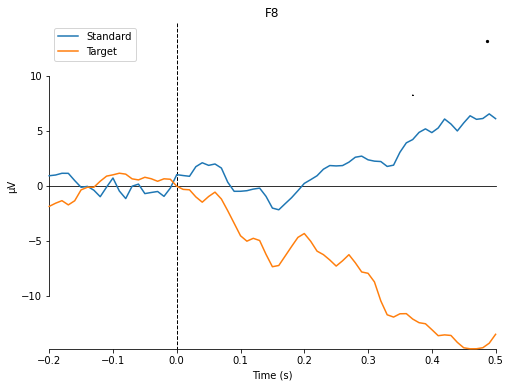

[<Figure size 576x432 with 2 Axes>]

In [65]:
mne.viz.plot_compare_evokeds({"Standard":standard, "Target":target}, picks=[6])        #We pass here two conditions to make a contrast

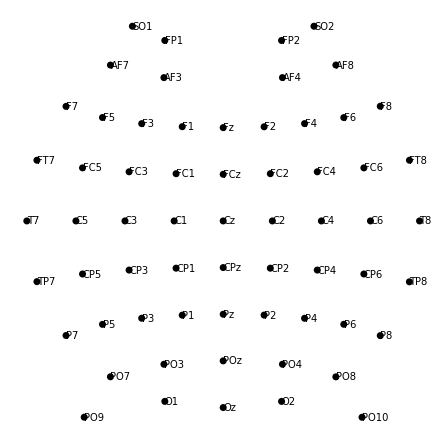

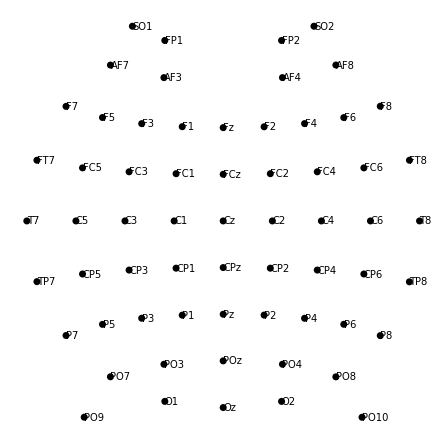

In [67]:
target.plot_sensors(show_names=True)

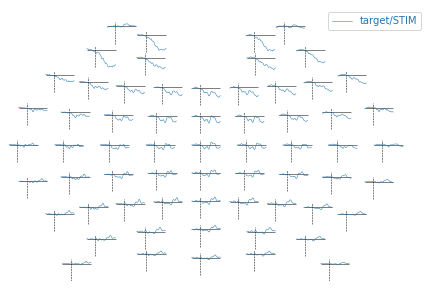

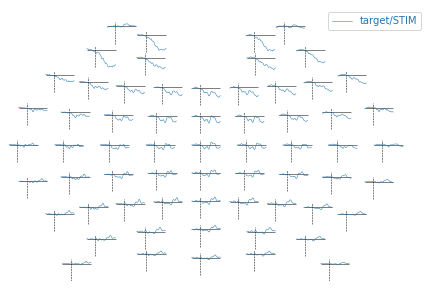

In [70]:
target.plot_topo()

Can we visulize the EEG from matplotlib?
* Yes, because we can present our data as numpy array

In [111]:
x = target.data  #target is changed to array
ch_names = target.info["ch_names"]

channel = "F1"
chIndex = [i for i, j in enumerate(ch_names) if i==j]

plt.plot(x[chIndex[0],:])
# plt.plot(x.T)
plt.title(channel)
plt.ylabel("Amplitude")
plt.xlabel('Time Samples')

IndexError: ignored

#Time-Frequency stuff


In [120]:
epoch_for_tfr = mne.read_epochs("/content/gdrive/MyDrive/Colab Notebooks/MNE/oddball2-epo.fif", preload=True)

Reading /content/gdrive/MyDrive/Colab Notebooks/MNE/oddball2-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


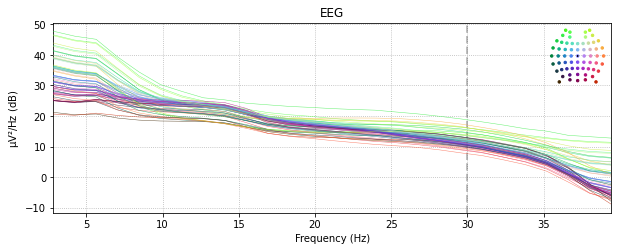

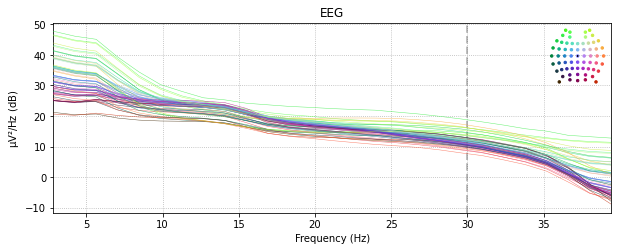

In [115]:
epoch_for_tfr.plot_psd(fmin=2, fmax=40)

In [123]:
epoch_for_tfr.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 STIM
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

In [124]:
mne.time_frequency.tfr_morlet?

In [125]:
from mne.time_frequency import tfr_morlet

In [130]:
freqs = list(range(3, 30))
tfr_target = tfr_morlet(epoch_for_tfr["target"], freqs, return_itc=False)
tfr_target = tfr_morlet(epoch_for_tfr["standard"], freqs, return_itc=False)

TypeError: ignored

In [ ]:
tfr_target.plot()

In [ ]:
tfr_contrast = mne.combine_evoked((tfr_standard, tfr_target), (-.5, .5))
tfr_contrast.apply_baseline((None, 0))



In [ ]:
tfr_contrast.plot(picks=[13]);